In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from astropy import constants as const
import astropy.units as u
from sklearn.neighbors import KernelDensity
import palettable
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
cs = palettable.colorbrewer.qualitative.Set1_9.mpl_colors

In [2]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_EQW_FLAG == 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

df = df[df.OIII_SNR_FLAG == 0] # Really should do this on OIII_FIT_Z_FULL_OIII_PEAK? Also, when I've finished calculating it
# just look at the fractional error, since that would be a lot simpler. 

# df = df[df.OIII_FIT_HB_Z_FLAG == 1] # need to relax this 

x = const.c.to(u.km/u.s)*(df.OIII_FIT_Z_FULL_OIII_PEAK - df.OIII_FIT_HB_Z)/(1.0 + df.OIII_FIT_Z_FULL_OIII_PEAK)

norm = np.std(x)
x = x / norm

x_d = np.linspace(-4, 4, 1000)

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

grid.best_params_



{'bandwidth': 0.36783797718286343}

/data/lc585/venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


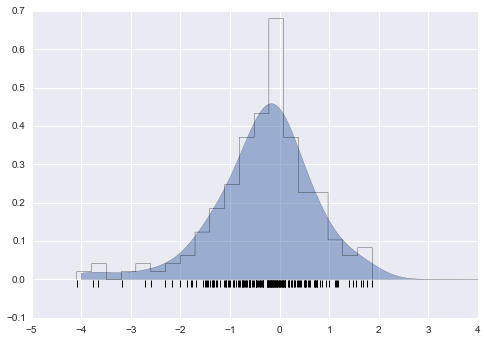

In [3]:
kde = KernelDensity(bandwidth=0.4, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

n, bins, patches = plt.hist(x,
        histtype='step',
        color='black',
        bins=20,
        zorder=1,
        normed=True)



Peak at 0 is suspicious 



In [10]:
ii = df.index[(x > -0.19274203) & (x < 0.12154142)]
for i in ii: print i


QSO003
QSO012
QSO013
QSO014
QSO016
QSO034
QSO037
QSO046
QSO059
QSO060
QSO177
QSO184
QSO203
QSO304
QSO323
QSO355
QSO364
QSO410
QSO478
QSO481
QSO505
QSO510
QSO516
QSO521
QSO527
QSO534
QSO539
QSO543
QSO547
QSO549
QSO552
QSO554
QSO559
QSO567
QSO582
QSO598
QSO623
QSO633
QSO634


In [7]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
print df.mfica_redchi.sort_values()



QSO431     0.16
QSO512     0.27
QSO508     0.28
QSO498     0.32
QSO493     0.32
QSO488     0.32
QSO490     0.34
QSO513     0.34
QSO173     0.35
QSO136     0.35
QSO504     0.42
QSO479     0.43
QSO478     0.43
QSO500     0.43
QSO496     0.44
QSO574     0.44
QSO152     0.46
QSO515     0.48
QSO143     0.48
QSO511     0.49
QSO506     0.50
QSO400     0.51
QSO117     0.52
QSO510     0.53
QSO573     0.53
QSO503     0.53
QSO122     0.54
QSO502     0.54
QSO481     0.54
QSO480     0.54
          ...  
QSO543     3.67
QSO014     3.73
QSO010     3.80
QSO050     3.87
QSO581     3.93
QSO042     4.01
QSO004     4.04
QSO587     4.16
QSO022     4.21
QSO017     4.21
QSO058     4.21
QSO601     4.52
QSO020     4.90
QSO560     4.99
QSO628     5.13
QSO168     5.72
QSO423     5.74
QSO025     5.90
QSO009     6.13
QSO051     6.14
QSO360     6.21
QSO015     6.46
QSO016     6.54
QSO584     7.67
QSO003    11.23
QSO299    12.35
QSO203    12.99
QSO007    14.90
QSO184    16.47
QSO629    22.55
Name: mfica_redchi, dtyp

In [11]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_EQW_FLAG == 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

print df.REDCHI.sort_values(ascending=False).head(n=20)

QSO203    52.05
QSO299    15.38
QSO518     7.37
QSO548     5.30
QSO534     5.26
QSO016     5.09
QSO536     4.99
QSO025     4.94
QSO527     4.50
QSO304     4.38
QSO302     4.21
QSO310     4.05
QSO020     3.93
QSO009     3.87
QSO314     3.80
QSO543     3.67
QSO308     3.57
QSO184     3.45
QSO315     3.42
QSO633     3.37
Name: REDCHI, dtype: float64


In [ ]:
print df.REDCHI.sort_values(ascending=False).head